In [2]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [3]:
data_input = pickle.load(open("../datasets/students_input.pd", "rb"))
data_target = pickle.load(open("../datasets/students_target.pd", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 4,
    "iterations": 100,
    "max_depth": 2,
    "init_learning_rate": 100,
    "learning_rate_decay": 0.995,
    "initialization_method": "random",
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance_lda",
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Max depth: 2
Accuracy disjoint DTs: 0.5345345345345346
Min:  0.496996996996997 Max:  0.496996996996997


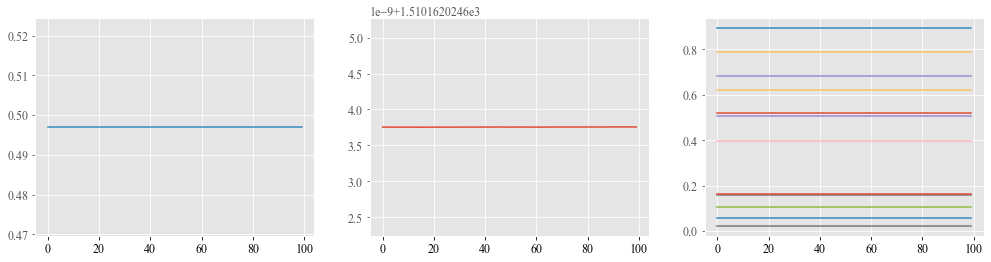

In [4]:
print("Max depth:",modt.max_depth)
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.subplot(1, 3, 1)
accuracy_line(modt)
plt.subplot(1, 3, 2)
plt.plot(modt.all_likelihood)
plt.subplot(1, 3, 3)
theta_development(modt)

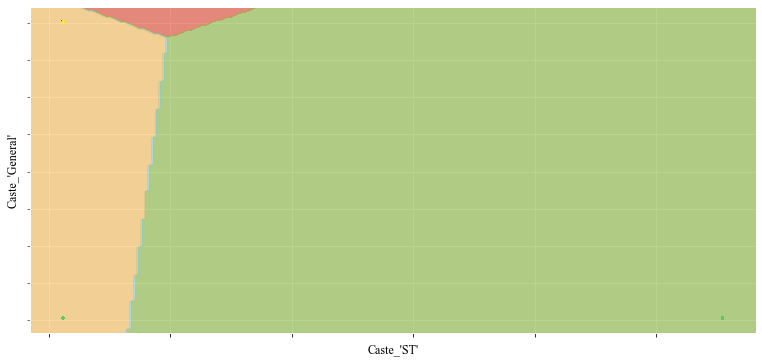

In [15]:
plt.figure(figsize=(13,6))
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=False,inverse_transform_standardization=False)
#plt.savefig("output/hrss1.pdf", bbox_inches="tight")

In [6]:
#Increase the width of Jupyter notebook s.t. we can see more
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
df = pd.DataFrame(modt.X)
df["target"] = modt.y
df["target"].nunique()

4

In [8]:
df.shape

(666, 51)

In [11]:
print(data_input.apply(lambda col: col.unique()))

Gender                                                 ['male', 'female']
Caste                                      ['General', 'OBC', 'SC', 'ST']
coaching                                               ['NO', 'WA', 'OA']
time                     ['ONE', 'TWO', 'THREE', 'FOUR', 'FIVE', 'SEVEN']
Class_ten_education                            ['SEBA', 'OTHERS', 'CBSE']
twelve_education                              ['AHSEC', 'CBSE', 'OTHERS']
medium                                  ['ENGLISH', 'OTHERS', 'ASSAMESE']
Class_ X_Percentage                ['Excellent', 'Vg', 'Good', 'Average']
Class_XII_Percentage               ['Excellent', 'Vg', 'Good', 'Average']
Father_occupation       ['DOCTOR', 'SCHOOL_TEACHER', 'BUSINESS', 'COLL...
Mother_occupation       ['OTHERS', 'HOUSE_WIFE', 'SCHOOL_TEACHER', 'DO...
dtype: object


In [12]:
df = df.sample(n=100, random_state=1)

In [13]:
import seaborn as sns
#sns.set_theme(style="ticks")

sns.pairplot(df,hue="target",diag_kind=None,corner=False)

KeyboardInterrupt: 

In [15]:
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [20]:
parameters["use_2_dim_gate_based_on"] = [16,9]

In [21]:
modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Max depth: 2
Accuracy disjoint DTs: 0.7732290124762106
Min:  0.7655741171495031 Max:  0.7691689574962994


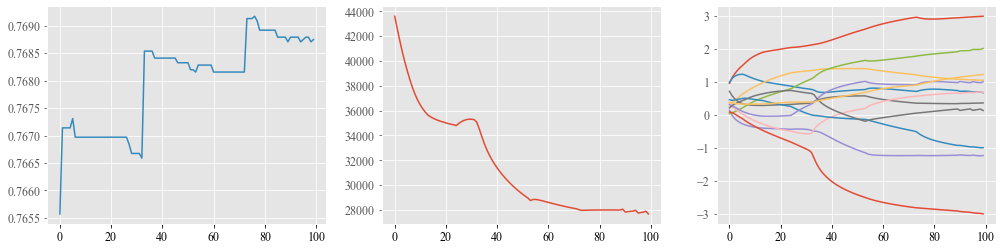

In [22]:
print("Max depth:",modt.max_depth)
print("Accuracy disjoint DTs:", modt.score_internal_disjoint())
fig = plt.gcf()
fig.set_size_inches(17,4)
plt.subplot(1, 3, 1)
accuracy_line(modt)
plt.subplot(1, 3, 2)
plt.plot(modt.all_likelihood)
plt.subplot(1, 3, 3)
theta_development(modt)

C:\Users\Robert\Code\mixture-of-decision-trees\plotting\..\modt\visualization.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_x_ticks)
C:\Users\Robert\Code\mixture-of-decision-trees\plotting\..\modt\visualization.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_y_ticks)


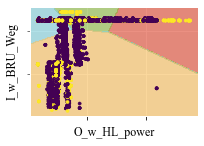

In [27]:
plt.figure(figsize=(3,2))
plot_gating(modt,iteration=modt.best_iteration,title=False,axis_digits=False,inverse_transform_standardization=True)
plt.savefig("output/hrss2.pdf", bbox_inches="tight")